# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

The dataset is extracted from the website IMDB, it contains data for about 10000 movie.
The dataset coontains information like users reviews, revenue, budget, popularity, cast and director and also some descreption.


### We have two questions for the analysis
Q1: Personally I like moves produced in 90s till around 2012, Can we find and sililar prefrence from other people?
Q2: Did movies budgets and profit increase from 90s to now?

In [8]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

In [9]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [10]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
 

In [61]:
df.drop(["homepage","imdb_id","budget","revenue","tagline","id","overview"], axis = 1, inplace = True)
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Check for dublicated data and delete any dublication

In [13]:
dublicated = df[df.duplicated()]
dublicated.index

Int64Index([2090], dtype='int64')

In [14]:
df.drop(index = dublicated.index, axis = 0, inplace = True)

In [20]:
## CHECK ALL DUBLICATED DATA IS DELETED
dublicated = df[df.duplicated()]
dublicated.index

Int64Index([], dtype='int64')

## Drop any row with NaN value

In [66]:
df.drop(["production_companies","keywords"], axis = 1, inplace = True)

In [22]:
df.dropna(axis = 0, how ='any', inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

<a id='eda'></a>
# Exploratory Data Analysis

### Q1: Personally I like moves produced in 90s till around 2012, Can we find and sililar prefrence from other people?

In [84]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### We can see that more than 50% of data has 0 budget and revenue, So we will make a new DataFrame and exclude these data and use this new dataframe for all budget and revenue analytics.

In [78]:
df_rev = df.query("revenue_adj > 0")
df_rev.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,44575.491648,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,72368.860461,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8285.000000,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,12154.000000,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,43959.000000,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
def trend(df,grpVar,yVar,start = 'mean'):
    # Groupby and plot the graph:
    df.groupby(grpVar)[yVar].agg(start).plot(figsize = (14,6))
    
    # Cleaning Var Names:
    grpVar = grpVar.replace("_"," ")
    yVar = yVar.replace("_"," ")
    
    # Add Title:
    plt.title(f'{start} {yVar} by {grpVar}'.title(), fontsize = 14, weight = 'bold')
    # Add x label
    plt.xlabel(grpVar.title(), fontsize = 10, weight = 'bold')
    # Add y label
    plt.ylabel(f'{start} {yVar}'.title(), fontsize = 10, weight = 'bold')

In [20]:
df_90 = df.query('release_year > 1989')

Text(0, 0.5, 'Vote Count')

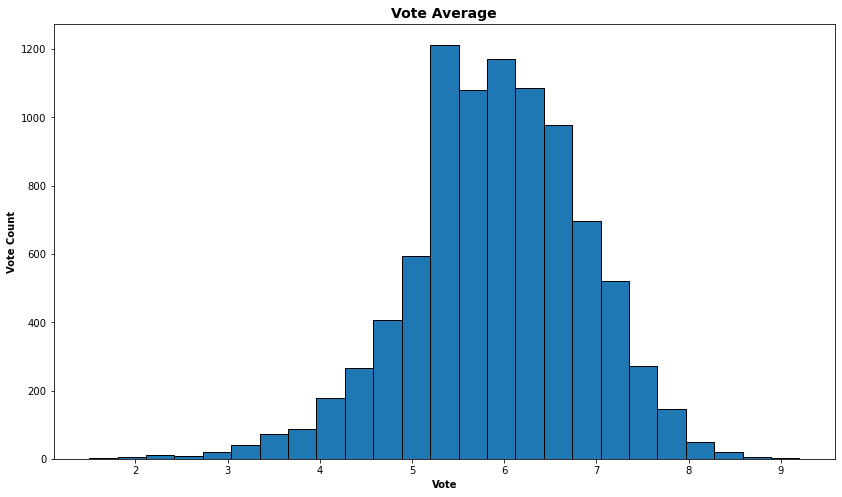

In [50]:
df_90['vote_average'].hist(grid = False, bins = 25, edgecolor = 'black', figsize = [14,8]);
plt.title('Vote Average', fontsize = 14, weight = 'bold')
plt.xlabel('Vote', fontsize = 10, weight = 'bold')
plt.ylabel('Vote Count', fontsize = 10, weight = 'bold')

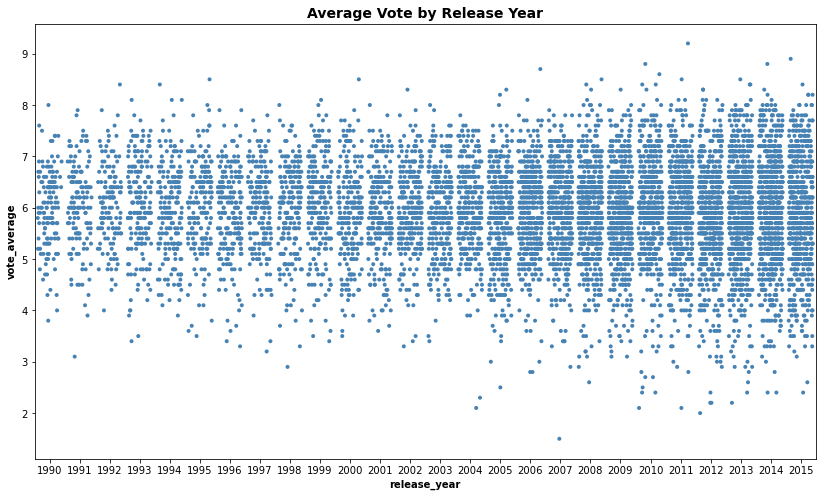

In [67]:
df_90.plot(x = 'release_year', y = 'vote_average', kind = 'scatter', figsize = [14,8]);
plt.title('Average Vote by Release Year', fontsize = 14, weight = 'bold');
plt.xlabel('Release Year', fontsize = 10, weight = 'bold');
plt.ylabel('Average Vote', fontsize = 10, weight = 'bold');
sns.stripplot(data=df_90, x = "release_year", y = "vote_average", 
              jitter = 0.4, color = 'steelblue', size = 4);

We can see from the previous plot that there is a spread of voting when progressing with time, To understand more lests dive deeper.

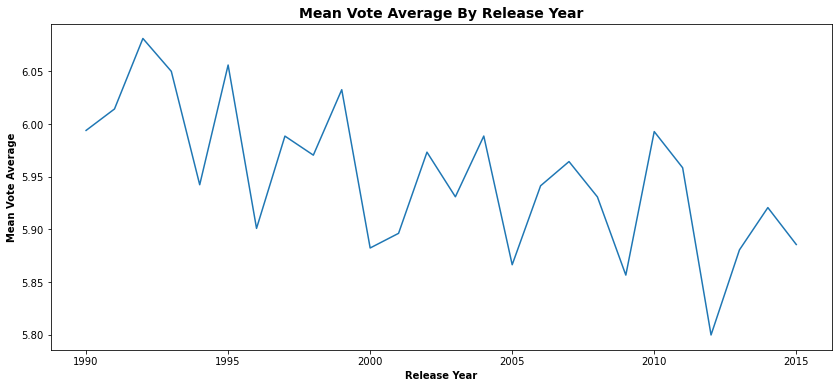

In [21]:
trend(df_90,'release_year','vote_average')

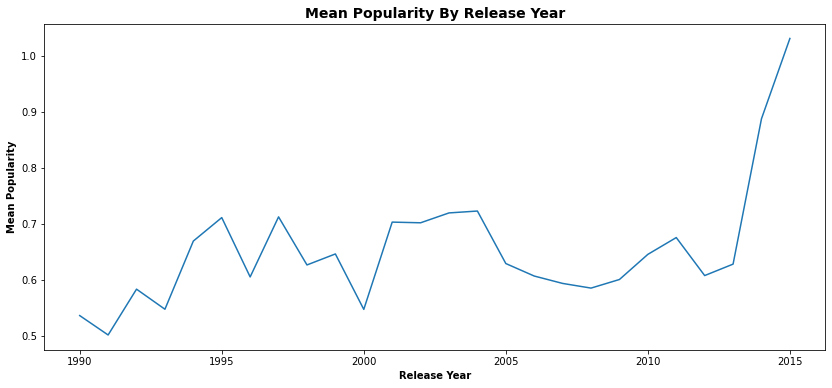

In [29]:
trend(df_90,"release_year","popularity")

The previous 2 plots shows a declination in the avarage vote when progressing with time, However, The mean popularity is increasing!

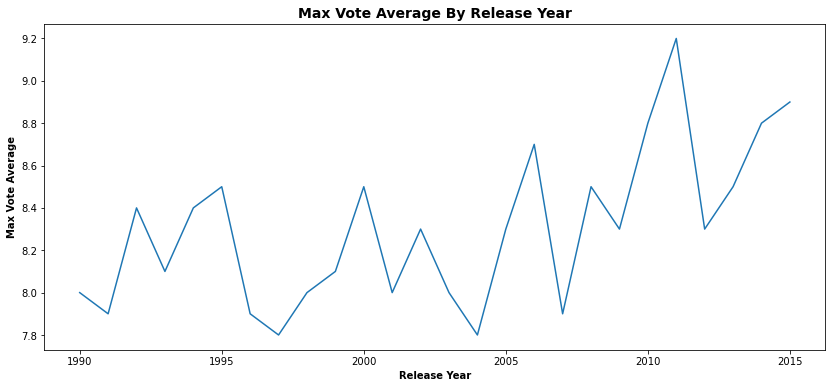

In [30]:
trend(df_90,"release_year","vote_average",'max')

THe Max avg. vote for movies was having an increasing trend untill around 2011, then it appears to be declining.

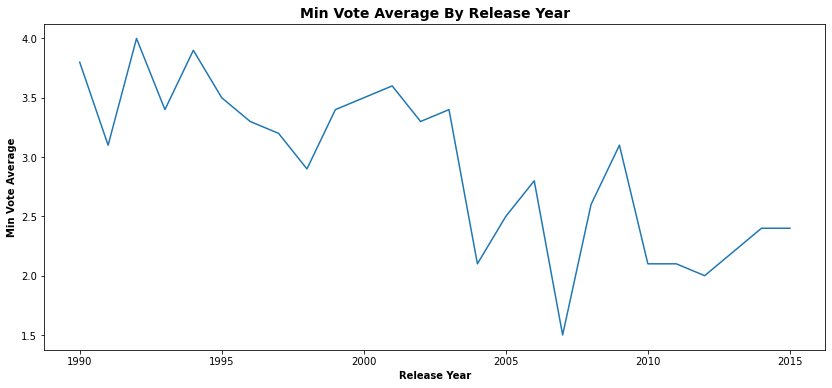

In [31]:
trend(df_90,"release_year","vote_average",'min')

The Min avg. vote is having a declining trend. meaning the bad movies are getting worse! To clarify lets separate the top movies (more than avg.) from bad movies (less than avg.)


In [73]:
df_90_mean = df_90["vote_average"].mean()

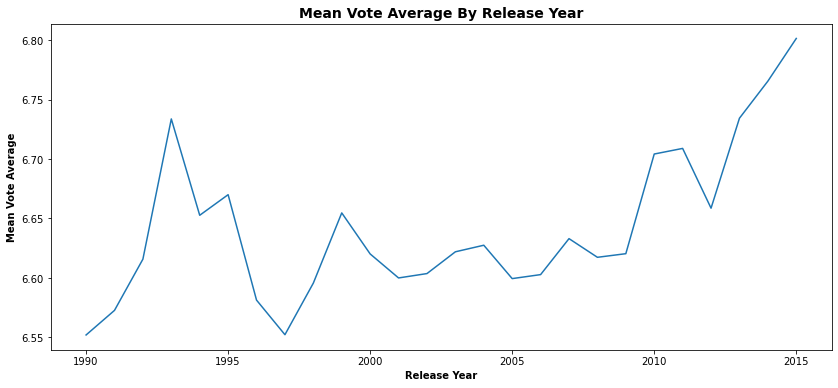

In [74]:
mean_score = df_90.query("vote_average > {}".format(df_90_mean))
trend(mean_score,"release_year","vote_average")

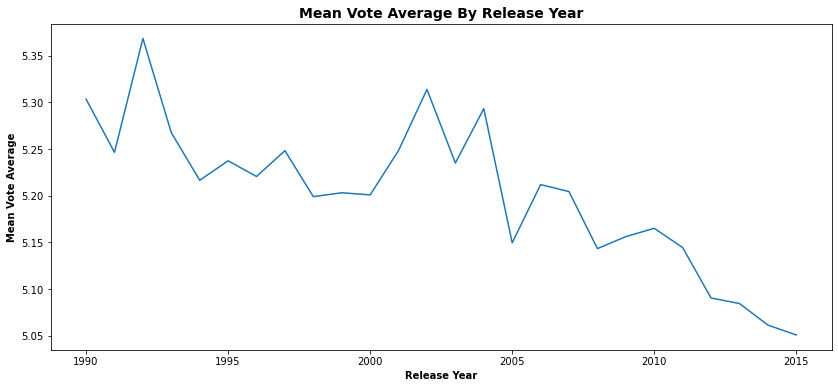

In [75]:
bott_score = df_90.query("vote_average < {}".format(df_90_mean))
trend(bott_score,"release_year","vote_average")

### From the previos 2 plots we see that top movies are getting more rates and bad movies are getting less rates progressing with time.

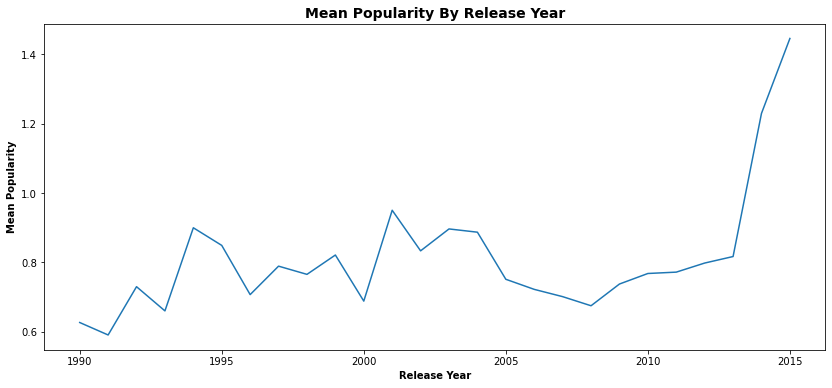

In [76]:
mean_score_pop = df_90.query("vote_average > {}".format(df_90_mean))
trend(mean_score_pop,"release_year","popularity")

# So it seems that top movies are getting more rates and more popularity, Meaning that the cinema makers are providing the market with what it needs and my preference for 90s movies and millennium moves till 2012 is just a personal taste.

### Q: Did movies budgets and profit increase from 90s to now?

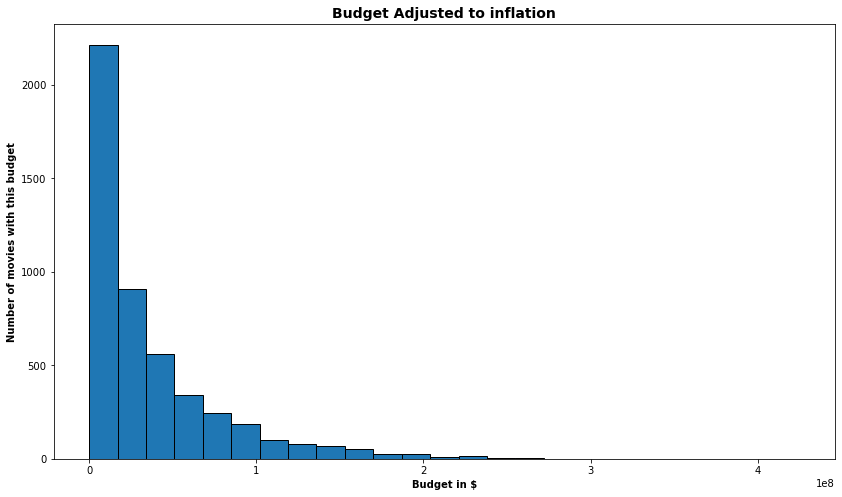

In [79]:
df_rev['budget_adj'].hist(grid = False, bins = 25, edgecolor = 'black', figsize = [14,8]);
plt.title('Budget Adjusted to inflation', fontsize = 14, weight = 'bold');
plt.xlabel('Budget in $', fontsize = 10, weight = 'bold');
plt.ylabel('Number of movies with this budget', fontsize = 10, weight = 'bold');

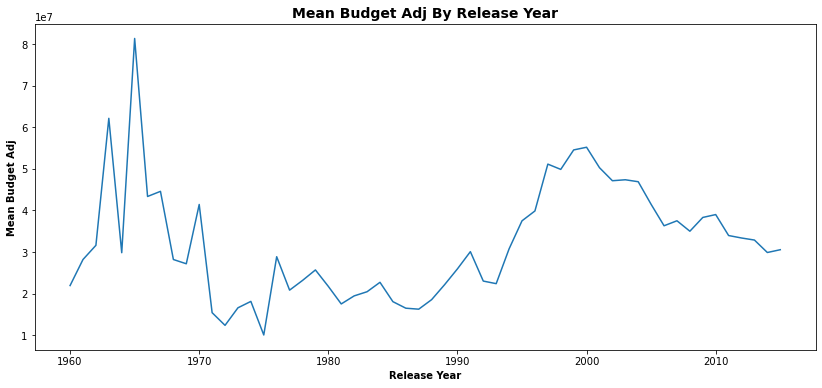

In [80]:
trend(df_rev,"release_year","budget_adj")

interisting! we can see that the mean budget increased untill around 2000 then we see a declinatin.

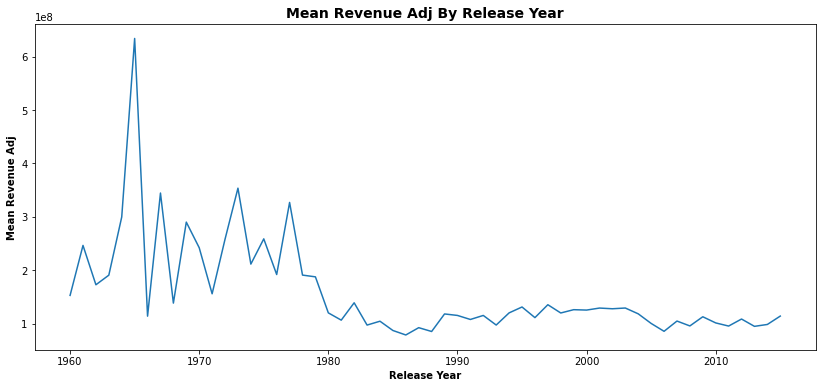

In [82]:
trend(df_rev,"release_year","revenue_adj")

### Interisting! Now we see that for moview we have data for the average revenue per year is almost the same from 1990 to 2015

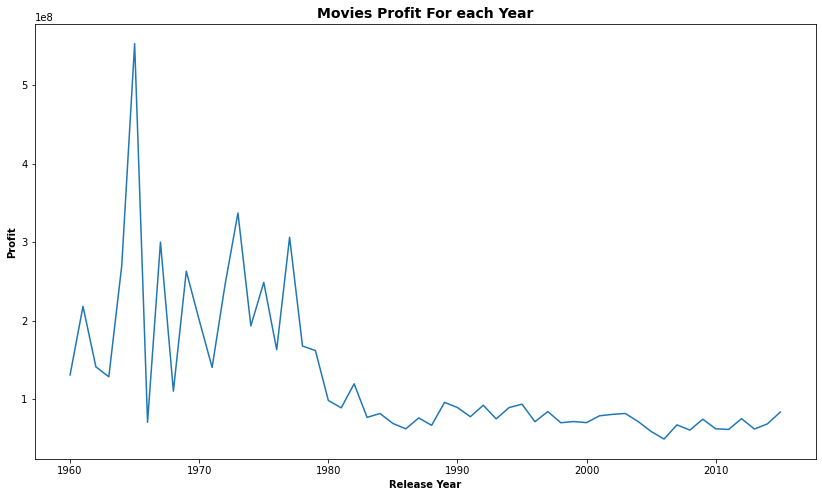

In [83]:
profit =df_rev.groupby("release_year").revenue_adj.mean() -  df_rev.groupby("release_year").budget_adj.mean()
profit.plot(figsize=[14,8]);
plt.title('Movies Profit For each Year', fontsize = 14, weight = 'bold');
plt.xlabel('Release Year', fontsize = 10, weight = 'bold');
plt.ylabel('Profit', fontsize = 10, weight = 'bold');

## We can see that from 1995 to 2000 producers spent more money on the budget but gained the same profit as before, Then they realised that they can make the same profit while reducing the budget, Meaning that producers managed to get reduce the budget while almost getting almost the same profit! which make a better investment portofolio.

<a id='conclusions'></a>
## Conclusions
So we can conclude two things:
1. it seems that top movies are getting more rates and more popularity, Meaning that the cinema makers are providing the market with what it needs and my preference for 90s movies and millennium moves till 2012 is just a personal taste.
So the answer to the first question is that there is no similar preference like min, On the contrary people recent movies popularity is increasing.

2. We can see a declining trend in the profit but the declinatin in the budget is much more than the profit, Meaning that producers managed to get to a wat to reduce the budget while almost getting almost the same profit! which make a better investment portofolio.

### Limitations
1. The dataset is limited till 2015 which is a big limitation to the analysis, So usnig a dataset to 2021 might get us totally different result.

2. For some reson around 50% of the original data has zero values for the budget and revenue, so we had to drop these data from financial analysis so the results could be totally different if we had a more complete dataset.
